In [1]:
import numpy as np 

data = np.load('data.npy')
targets = np.load('target.npy')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Activation , Dropout , Flatten, BatchNormalization , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [49]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same',input_shape=data.shape[1:]))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2 , activation ='sigmoid'))

# compile model
model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.001),
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 25, 25, 256)       295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 512)      

In [51]:
checkpoint = ModelCheckpoint(r'E:\Face_mask_detection_project\model\face123.model',
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1)
earlystop = EarlyStopping(monitor='val_loss',
                         min_delta=0,
                         patience=10,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [checkpoint,earlystop]

In [52]:
from sklearn.model_selection import train_test_split

train_data , test_data , train_target , test_target = train_test_split(data , targets , test_size=0.2)

In [53]:
model_history = model.fit(train_data , train_target , epochs=30 , callbacks=callbacks , validation_split = 0.2)

Epoch 1/30
152/152 [==============================] - 8s 51ms/step - loss: 0.6642 - accuracy: 0.5885 - val_loss: 0.6314 - val_accuracy: 0.6452

Epoch 00001: val_loss improved from inf to 0.63144, saving model to E:\Face_mask_detection_project\model\face123.model
INFO:tensorflow:Assets written to: E:\Face_mask_detection_project\model\face123.model\assets
Epoch 2/30
152/152 [==============================] - 7s 49ms/step - loss: 0.5114 - accuracy: 0.7549 - val_loss: 0.4273 - val_accuracy: 0.8205

Epoch 00002: val_loss improved from 0.63144 to 0.42731, saving model to E:\Face_mask_detection_project\model\face123.model
INFO:tensorflow:Assets written to: E:\Face_mask_detection_project\model\face123.model\assets
Epoch 3/30
152/152 [==============================] - 7s 49ms/step - loss: 0.3559 - accuracy: 0.8528 - val_loss: 0.2682 - val_accuracy: 0.9032

Epoch 00003: val_loss improved from 0.42731 to 0.26822, saving model to E:\Face_mask_detection_project\model\face123.model
INFO:tensorflow:A

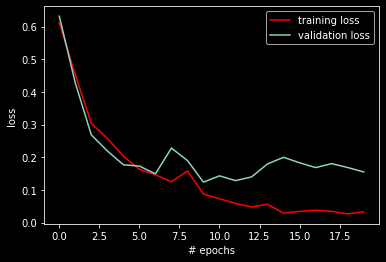

In [54]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'],'r',label = 'training loss')
plt.plot(model_history.history['val_loss'],label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

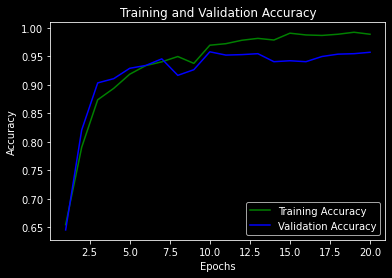

In [55]:
# import matplotlib.pyplot as plt
acc_train = model_history.history['accuracy']
acc_val = model_history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs,acc_train , 'g',label = 'Training Accuracy')
plt.plot(epochs,acc_val , 'b',label = 'Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
model.evaluate(test_data,test_target)

48/48 [==============================] - 1s 19ms/step - loss: 0.1762 - accuracy: 0.9312


[0.1762341856956482, 0.9311714172363281]